In [1]:
#Problem1
import pandas as pd
df = pd.read_csv('/Users/mendodolkarhyolmo/sem3/AI/bank.csv')
print(df)
#columns with dtypes=object
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

#unique values of those columns.
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
#check for the total number of null values in each column.
null_counts = df.isnull().sum()
print(null_counts)
# Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
# ”.csv” with name ”banknumericdata.csv”
df_numeric = df.select_dtypes(exclude=['object'])
df_numeric.to_csv('banknumericdata.csv', index=False)
print(df_numeric)

# Read ”banknumericdata.csv” and Find the summary statistics.
df_numeric = pd.read_csv('banknumericdata.csv')
summary_stats = df_numeric.describe()

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [5]:
#Problem2
import pandas as pd


df = pd.read_csv("/Users/mendodolkarhyolmo/sem3/AI/medical_students_dataset.csv")   


print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())                
df["age"] = df["age"].fillna(df["age"].mean())       
df["height"] = df["height"].fillna(df["height"].median())

df["gender"] = df["gender"].fillna(df["gender"].mode())

dup_count = df.duplicated().sum()
print("\nNumber of duplicated rows:", dup_count)    


df_no_dup = df.drop_duplicates(keep="first")       


df_no_dup.to_csv("medical_student_clean.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

Missing values per column:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight           

KeyError: 'age'

In [6]:
#3.2 Probelm 1
import pandas as pd

# Load titanic dataset
df = pd.read_csv("/Users/mendodolkarhyolmo/sem3/AI/Titanic-Dataset.csv")

# Subset for required columns
cols = ["Name", "Pclass", "Sex", "Age", "Fare", "Survived"]
titanic_sub = df[cols]                                   # select specific columns [web:42][web:45][web:55]

# Keep only first-class passengers (Pclass == 1)
titanic_first = titanic_sub[titanic_sub["Pclass"] == 1] # boolean row filter [web:42][web:47][web:59]

# Compute statistics on Fare column
fare_mean = titanic_first["Fare"].mean()
fare_median = titanic_first["Fare"].median()
fare_max = titanic_first["Fare"].max()
fare_min = titanic_first["Fare"].min()                  # column stats [web:19][web:58][web:60]

print("Mean Fare (1st class):", fare_mean)
print("Median Fare (1st class):", fare_median)
print("Max Fare (1st class):", fare_max)
print("Min Fare (1st class):", fare_min)


Mean Fare (1st class): 84.1546875
Median Fare (1st class): 60.287499999999994
Max Fare (1st class): 512.3292
Min Fare (1st class): 0.0


In [7]:
#Problem2
import pandas as pd
df = pd.read_csv("/Users/mendodolkarhyolmo/sem3/AI/Titanic-Dataset.csv")
# Count null values in Age
null_age_count = titanic_first["Age"].isnull().sum()  
print("Number of null values in Age:", null_age_count)

titanic_first_no_null_age = titanic_first.dropna(subset=["Age"]) 

print("Null Age after drop:", titanic_first_no_null_age["Age"].isnull().sum())


Number of null values in Age: 30
Null Age after drop: 0


In [8]:
#Problem 3
import pandas as pd

df = pd.read_csv("/Users/mendodolkarhyolmo/sem3/AI/Titanic-Dataset.csv")
embarked_dummies = pd.get_dummies(df["Embarked"],
                                  prefix="Embarked")

df = pd.concat([df, embarked_dummies], axis=1)       

df = df.drop(columns=["Embarked"])              

print(df.head())                                       

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


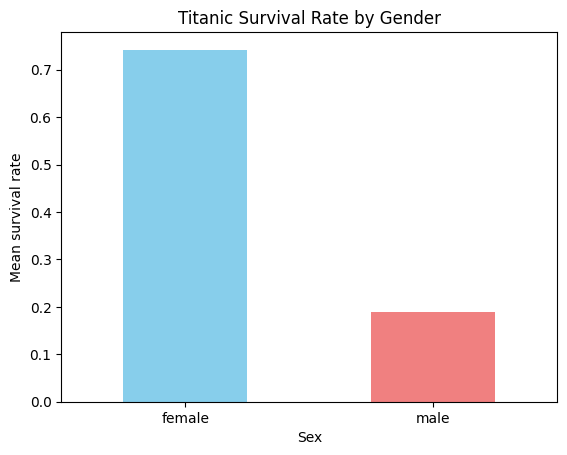

In [12]:
#Problem 4
import pandas as pd
import matplotlib.pyplot as plt


# Load Titanic data
df = pd.read_csv("/Users/mendodolkarhyolmo/sem3/AI/Titanic-Dataset.csv")

# 1. Mean survival rate by gender
mean_survival_by_sex = df.groupby("Sex")["Survived"].mean()  
print(mean_survival_by_sex)

# 2. Simple bar plot using pandas / matplotlib
mean_survival_by_sex.plot(kind="bar", color=["skyblue", "lightcoral"])
plt.ylabel("Mean survival rate")
plt.title("Titanic Survival Rate by Gender")
plt.xticks(rotation=0)
plt.show()                                                

# --- Alternative using seaborn directly (also correct) ---
# sns.barplot(x="Sex", y="Survived", data=df, ci=None)
# plt.ylabel("Mean survival rate")
# plt.title("Titanic Survival Rate by Gender")
# plt.show()                                               


  Embarked     Sex  Survived
0        C  female  0.876712
1        C    male  0.305263
2        Q  female  0.750000
3        Q    male  0.073171
4        S  female  0.689655
5        S    male  0.174603


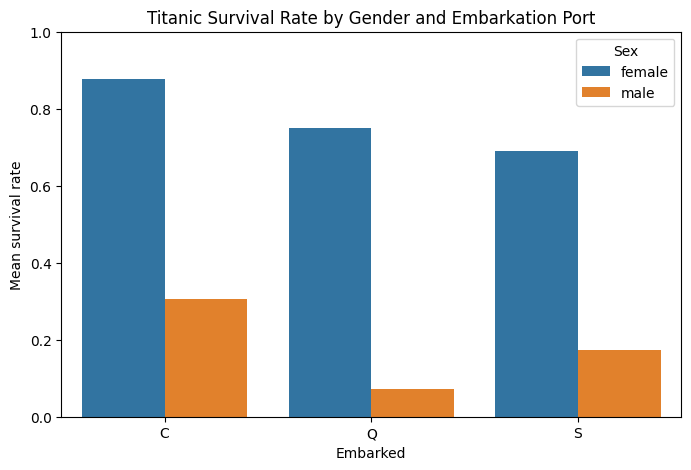

In [17]:
#Problem 5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load data
df = pd.read_csv("/Users/mendodolkarhyolmo/sem3/AI/Titanic-Dataset.csv")

# 1. Mean survival rate grouped by Sex and Embarked
survival_sex_embarked = (
    df.groupby(["Embarked", "Sex"])["Survived"]
      .mean()
      .reset_index()
)  # grouped means [web:112][web:104][web:107]

print(survival_sex_embarked)

# 2. Visualization: survival by gender, broken down by port
plt.figure(figsize=(8, 5))
sns.barplot(
    data=survival_sex_embarked,
    x="Embarked", y="Survived", hue="Sex"
)  # grouped bar plot [web:73][web:102][web:120]

plt.ylabel("Mean survival rate")
plt.title("Titanic Survival Rate by Gender and Embarkation Port")
plt.ylim(0, 1)
plt.show()
